In [6]:
# %pip install pandas numpy matplotlib seaborn scikit-learn joblib

In [ ]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="missing ScriptRunContext")


conn_str = (
        "Driver={SQL Server};"  # Specify the driver for SQL Server
        "Server=DESKTOP-KKKKAAM\SQLEXPRESS;"  # Specify your SQL Server instance
        "Database=db_Churn;"  # Specify the database name
        "Trusted_Connection=yes;"  # Use Windows Authentication for the connection
    )
    # Establish the connection to the database
conn = pyodbc.connect(conn_str)

<>:17: SyntaxWarning: invalid escape sequence '\S'
<>:17: SyntaxWarning: invalid escape sequence '\S'
C:\Users\User\AppData\Local\Temp\ipykernel_11404\501446226.py:17: SyntaxWarning: invalid escape sequence '\S'
  "Server=DESKTOP-KKKKAAM\SQLEXPRESS;"  # Specify your SQL Server instance


In [2]:
query_churn = "SELECT * FROM vw_ChurnData"

df_churn = pd.read_sql(query_churn, conn)
df_churn.head()

C:\Users\User\AppData\Local\Temp\ipykernel_11404\2739699537.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_churn = pd.read_sql(query_churn, conn)


,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,None,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [ ]:
# Drop columns that won't be used for prediction
df_churn = df_churn.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

 

# Encode categorical variables except the target variable ( Label Encoding is fine here because most columns are binary or limited categories ).
label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()     # This creates a LabelEncoder object. It knows how to: Read text values and Convert them into numbers

    # Converting Text to Numbers:
    df_churn[column] = label_encoders[column].fit_transform(df_churn[column])      
    # '.fit_transform()' This does two things at once: '1️⃣ fit' Learns unique categories, '2️⃣ transform' Converts them into numbers:'

 

# Manually encode the target variable 'Customer_Status'
df_churn['Customer_Status'] = df_churn['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

 

# Split data into features and target
X = df_churn.drop('Customer_Status', axis=1)
y = df_churn['Customer_Status']

 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state=42 ensures: Same split every time, Reproducible results


## **Training Random Forest Model:**

Confusion Matrix:
[[783  64]
 [126 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



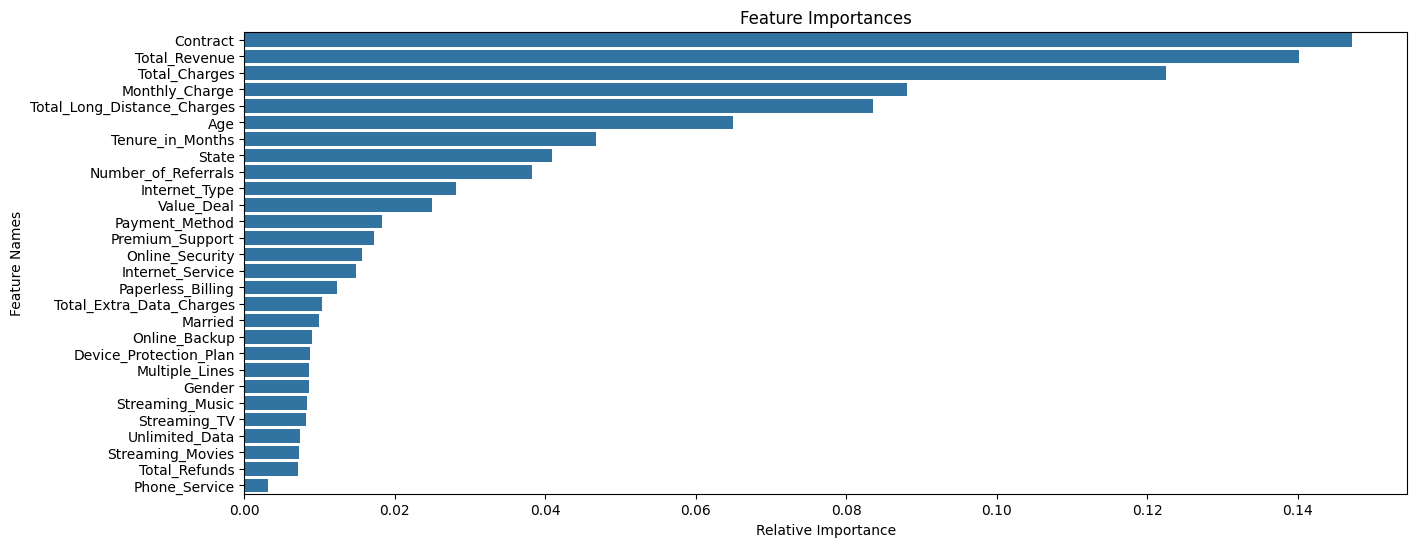

In [5]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# Train the model
rf_model.fit(X_train, y_train)

 
# Make predictions
y_pred = rf_model.predict(X_test)


# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [6]:
query_join = "SELECT * FROM vw_JoinData"
df_join = pd.read_sql(query_join, conn)


# Display the first few rows of the fetched data
df_join.head()

 
# Retain the original DataFrame to preserve unencoded columns
original_data = df_join.copy()

 
# Retain the Customer_ID column
customer_ids = df_join['Customer_ID']
 

# Drop columns that won't be used for prediction in the encoded DataFrame
df_join = df_join.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

 
# Encode categorical variables using the saved label encoders
for column in df_join.select_dtypes(include=['object']).columns:

    df_join[column] = label_encoders[column].transform(df_join[column])

 
# Make predictions
new_predictions = rf_model.predict(df_join)


# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

 

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

 

# Save the results
original_data.to_csv(r"D:/kaif2/04_Projects/Data_Analyst/Python/Churn Analysis/Data/Predictions.csv", index=False)

C:\Users\User\AppData\Local\Temp\ipykernel_11404\1650454676.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_join = pd.read_sql(query_join, conn)
